In [1]:
# fbprophet for 30 minute prediction

import pandas as pd
from prophet import Prophet

In [2]:
df = pd.read_csv('December-2019.csv')
df.head()

,ds,KE
0,12/1/2019 0:00,207
1,12/1/2019 0:01,206
2,12/1/2019 0:02,205
3,12/1/2019 0:03,205
4,12/1/2019 0:04,205


In [3]:
df["ds"]=pd.to_datetime(df['ds'])
df=df.rename(columns={'KE':'y'})
df.tail()

,ds,y
44635,2019-12-31 23:55:00,134
44636,2019-12-31 23:56:00,134
44637,2019-12-31 23:57:00,134
44638,2019-12-31 23:58:00,134
44639,2019-12-31 23:59:00,134


In [4]:
prediction_size = 30
train_df = df[:-prediction_size]

In [7]:
m = Prophet(daily_seasonality=True)
m.fit(train_df)

future = m.make_future_dataframe(periods=60, freq='1min')
forecast = m.predict(future)
forecast.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
44665,2020-01-01 00:25:00,126.071166,85.454017,129.304018,126.071166,126.071166,-17.964435,-17.964435,-17.964435,-12.980545,-12.980545,-12.980545,-4.983890,-4.983890,-4.983890,0.0,0.0,0.0,108.106731
44666,2020-01-01 00:26:00,126.059274,86.042107,131.079471,126.059274,126.059274,-17.969616,-17.969616,-17.969616,-12.982249,-12.982249,-12.982249,-4.987367,-4.987367,-4.987367,0.0,0.0,0.0,108.089658
44667,2020-01-01 00:27:00,126.047381,85.553065,131.575770,126.047381,126.047381,-17.974550,-17.974550,-17.974550,-12.983713,-12.983713,-12.983713,-4.990837,-4.990837,-4.990837,0.0,0.0,0.0,108.072831
44668,2020-01-01 00:28:00,126.035488,83.584240,131.166596,126.035488,126.035488,-17.979237,-17.979237,-17.979237,-12.984935,-12.984935,-12.984935,-4.994302,-4.994302,-4.994302,0.0,0.0,0.0,108.056251
44669,2020-01-01 00:29:00,126.023596,85.550230,131.062200,126.023596,126.023596,-17.983676,-17.983676,-17.983676,-12.985916,-12.985916,-12.985916,-4.997760,-4.997760,-4.997760,0.0,0.0,0.0,108.039920


In [6]:
m.plot(forecast).savefig('1.jpeg', dpi=400)

NameError: name 'forecast' is not defined

In [24]:
forecast.to_csv('PredictOutput.csv')

(18262.0, 18262.000347222223)

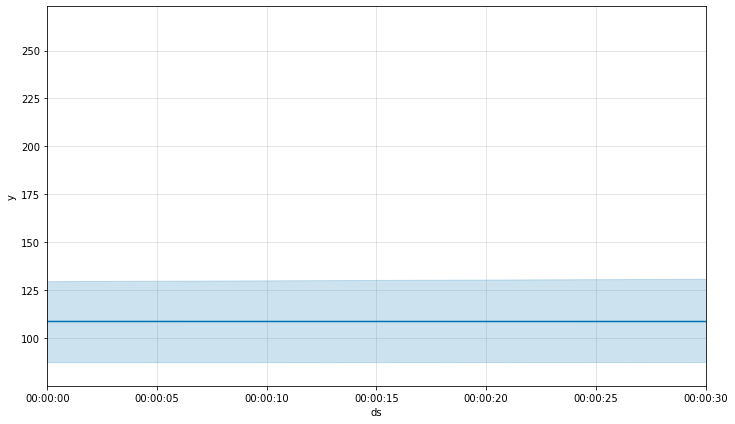

In [35]:
fig = m.plot(forecast)
ax = fig.gca()
# setting x limit. date range to plot
ax.set_xlim(pd.to_datetime(['2020-01-01 00:00:00', '2020-01-01 00:00:30'])) 
# we can ignore the shadow part by setting y limit
#ax.set_ylim([26, 29]) 

In [31]:
df1 = pd.read_csv('PredictOutput.csv')

In [38]:
df1.head()

,Unnamed: 0,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,0,2019-12-01 00:00:00,180.989205,154.616003,199.052147,180.989205,180.989205,-3.914161,-3.914161,-3.914161,-12.862708,-12.862708,-12.862708,8.948547,8.948547,8.948547,0.0,0.0,0.0,177.075044
1,1,2019-12-01 00:01:00,181.004358,155.105619,200.668814,181.004358,181.004358,-3.905247,-3.905247,-3.905247,-12.870116,-12.870116,-12.870116,8.964869,8.964869,8.964869,0.0,0.0,0.0,177.099111
2,2,2019-12-01 00:02:00,181.019512,155.872675,199.363220,181.019512,181.019512,-3.896121,-3.896121,-3.896121,-12.877305,-12.877305,-12.877305,8.981184,8.981184,8.981184,0.0,0.0,0.0,177.123391
3,3,2019-12-01 00:03:00,181.034665,154.132800,199.520425,181.034665,181.034665,-3.886783,-3.886783,-3.886783,-12.884275,-12.884275,-12.884275,8.997492,8.997492,8.997492,0.0,0.0,0.0,177.147882
4,4,2019-12-01 00:04:00,181.049819,155.196309,199.135763,181.049819,181.049819,-3.877232,-3.877232,-3.877232,-12.891025,-12.891025,-12.891025,9.013793,9.013793,9.013793,0.0,0.0,0.0,177.172587


In [37]:
df1['yhat']

0        177.075044
1        177.099111
2        177.123391
3        177.147882
4        177.172587
            ...    
44665    108.106731
44666    108.089658
44667    108.072831
44668    108.056251
44669    108.039920
Name: yhat, Length: 44670, dtype: float64